In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from itertools import product, combinations
import numpy as np
import scipy
from scipy.spatial.transform import Rotation as R
from scipy.optimize import minimize, basinhopping
import matplotlib
matplotlib.rcParams['figure.dpi'] = 140
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from tqdm import tqdm
import shutil
import pickle
import multiprocessing
from multiprocessing import Process

import sys
sys.path.append("../")
from source import *

In [15]:
# with open("./GeneratedData/Dataset1.pkl", "rb") as f:
#         dataset = pickle.load(f)

Object cube2 must be on the right of cube1.
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.001270650084632452
       x: [-7.434e+00 -6.360e+00  0.000e+00  7.407e+00 -7.437e+00
            0.000e+00]
     nit: 3
   direc: [[-1.300e+00 -1.066e+00 ...  1.151e+00 -0.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-3.735e-01 -3.081e-01 ...  2.307e-02  0.000e+00]]
    nfev: 343


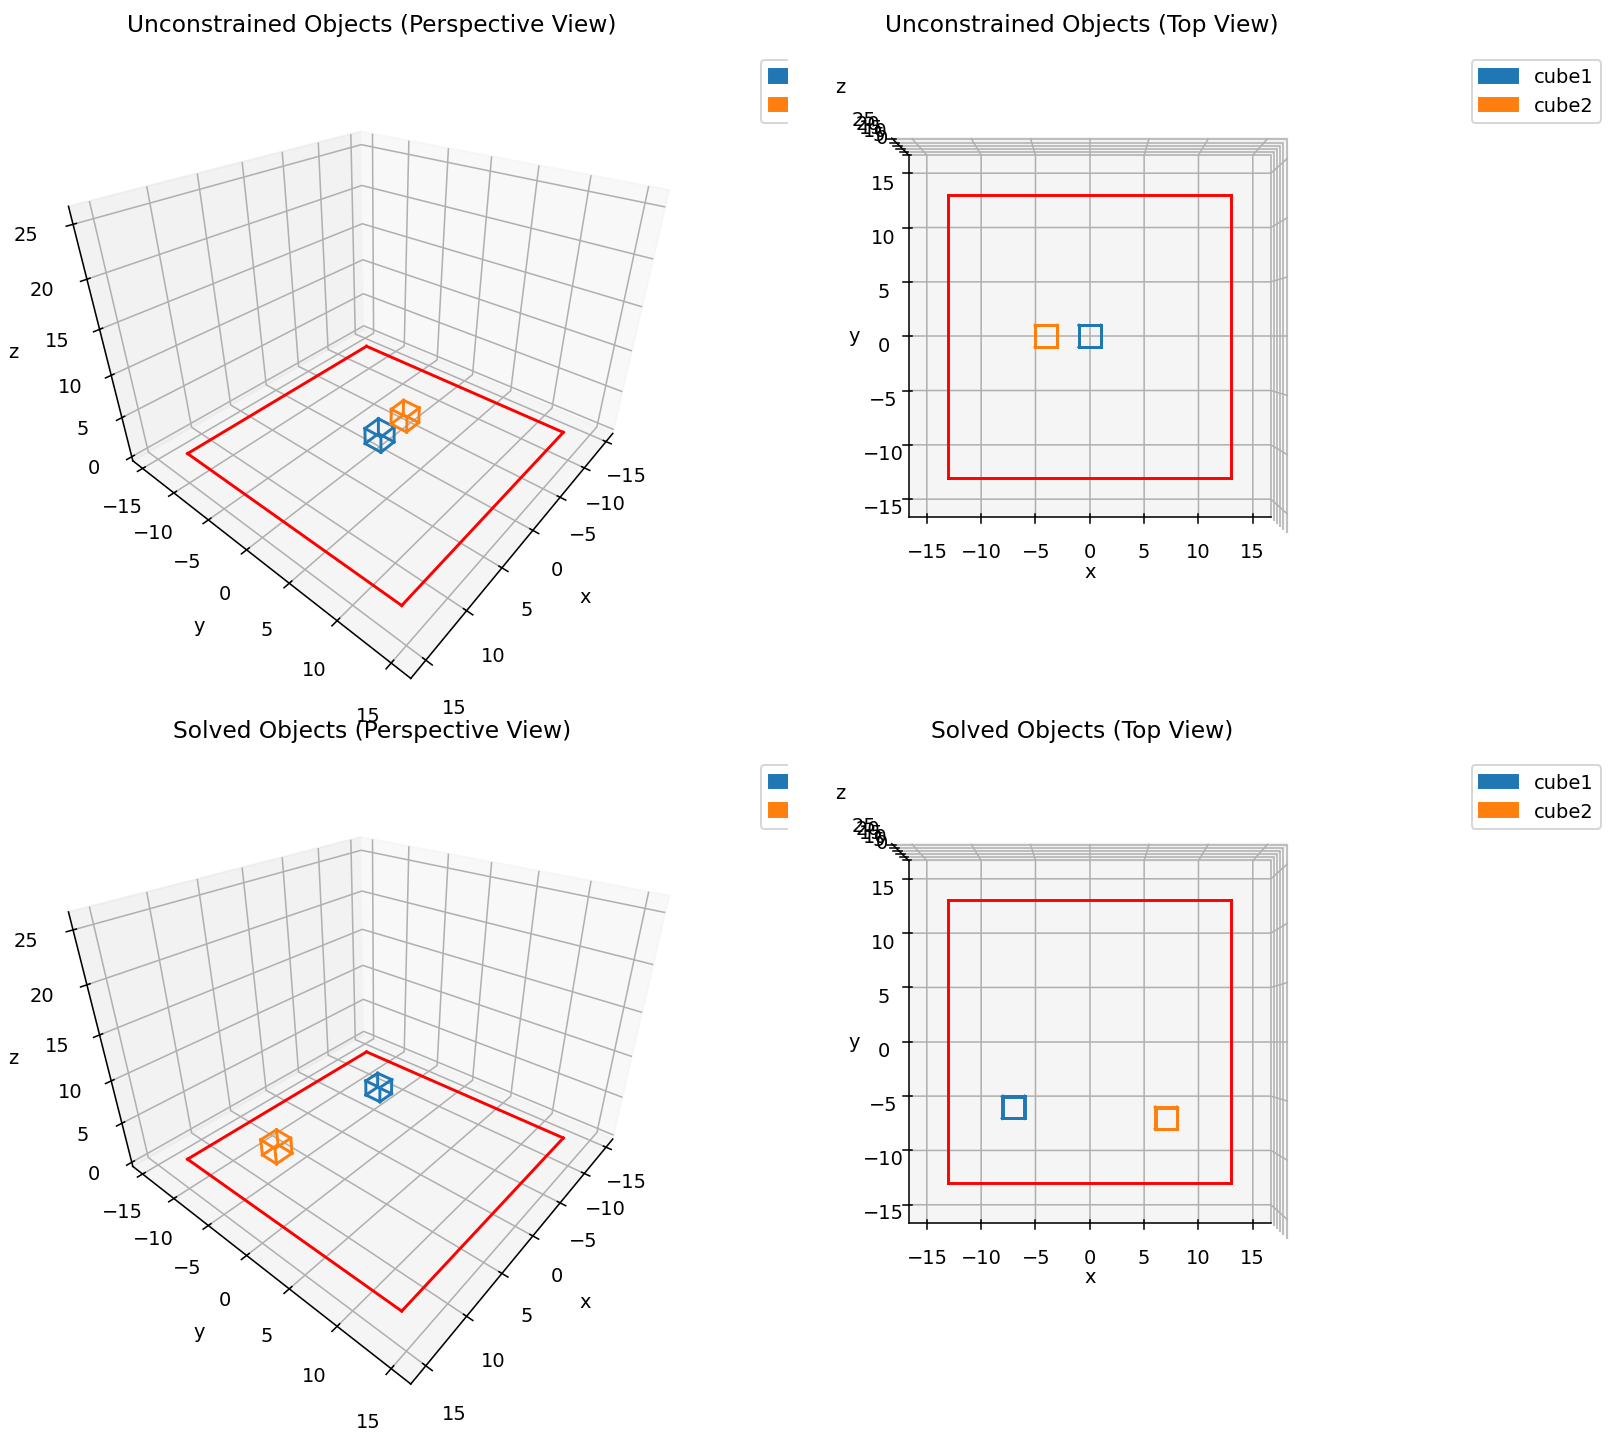

In [3]:
# problem = Problem(scene_xmin=-10, scene_xmax=10,
#                   scene_ymin=-10, scene_ymax=10,
#                   scene_zmax=10)

# # add objects
# cube1 = Cuboid([0,0,1],[0,0,0],[2,2,2],"cube1")
# problem.add_optimizable_object(cube1)
# cube2 = Cuboid([-4,0,1],[0,0,0],[2,2,2],"cube2")
# problem.add_optimizable_object(cube2)

# # add constraints
# constraint = Direction([cube1, cube2],"right")
# problem.add_constraint_proposition(constraint, weight=1)
# print(constraint)

# # plot initial/final and solve
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12), subplot_kw={"projection": "3d"})
# problem.plot_on_ax(ax=ax[0][0], ax_title="Unconstrained Objects (Perspective View)",
#                                elev=30, azim=40, persp=True)
# problem.plot_on_ax(ax=ax[0][1], ax_title="Unconstrained Objects (Top View)",
#                                elev=90, azim=-90, persp=False)
# problem.solve(verbose=True)
# problem.plot_on_ax(ax=ax[1][0], ax_title="Solved Objects (Perspective View)",
#                                elev=30, azim=40, persp=True)
# problem.plot_on_ax(ax=ax[1][1], ax_title="Solved Objects (Top View)",
#                                elev=90, azim=-90, persp=False)

  0%|          | 0/5 [00:00<?, ?it/s]

<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x145de9650>, <source.geometry.cuboid.Cuboid object at 0x15488ed10>] with badness 0.03878817960545633.
<class 'source.constraints.perpendicularity.Perpendicularity'> with objects [<source.geometry.cuboid.Cuboid object at 0x15488ed10>, <source.geometry.cuboid.Cuboid object at 0x145de9650>] with badness 0.0015383588173470408.
<class 'source.constraints.direction.Direction'> with objects [<source.geometry.cuboid.Cuboid object at 0x146e5b8d0>, <source.geometry.cuboid.Cuboid object at 0x145b533d0>] with badness 0.1757508165660523.
<class 'source.constraints.target.Target'> with objects [<source.geometry.cuboid.Cuboid object at 0x145de9650>, <source.geometry.cuboid.Cuboid object at 0x145b533d0>] with badness 0.0008631789967876169.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x145de9650>, <source.geometry.

 20%|██        | 1/5 [00:01<00:04,  1.19s/it]

<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cuboid object at 0x147f1c590>, <source.geometry.cuboid.Cuboid object at 0x147dead10>] with badness 1.0619697363754257e-08.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x14426f090>, <source.geometry.cuboid.Cuboid object at 0x144010bd0>] with badness 0.025171057992040557.
<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cuboid object at 0x147f1c590>, <source.geometry.cuboid.Cuboid object at 0x15162afd0>, <source.geometry.cuboid.Cuboid object at 0x143feab50>] with badness 0.25756163360425827.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x147dead10>, <source.geometry.cuboid.Cuboid object at 0x14426f090>, <source.geometry.cuboid.Cuboid object at 0x145b64a50>] with badness 0.005722133758042647.
<class 'source.constraints.symmetry

 40%|████      | 2/5 [00:03<00:05,  1.90s/it]

<class 'source.constraints.proximity.Proximity'> with objects [<source.geometry.cuboid.Cuboid object at 0x1410711d0>, <source.geometry.cuboid.Cuboid object at 0x120593190>] with badness 0.0.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x1515f0a50>, <source.geometry.cuboid.Cuboid object at 0x147d0b710>] with badness 8.355983016627988e-09.
<class 'source.constraints.direction.Direction'> with objects [<source.geometry.cuboid.Cuboid object at 0x145ce00d0>, <source.geometry.cuboid.Cuboid object at 0x1410711d0>] with badness 0.0017018934437876276.
<class 'source.constraints.perpendicularity.Perpendicularity'> with objects [<source.geometry.cuboid.Cuboid object at 0x145ce00d0>, <source.geometry.cuboid.Cuboid object at 0x1515f0a50>] with badness 0.021847622018482282.
<class 'source.constraints.target.Target'> with objects [<source.geometry.cuboid.Cuboid object at 0x145ce00d0>, <source.geometry.cuboid.Cuboid object at 0x1

 60%|██████    | 3/5 [00:06<00:04,  2.30s/it]

<class 'source.constraints.perpendicularity.Perpendicularity'> with objects [<source.geometry.cuboid.Cuboid object at 0x151717cd0>, <source.geometry.cuboid.Cuboid object at 0x145d22fd0>] with badness 7.615247031034222e-05.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x145f02ed0>, <source.geometry.cuboid.Cuboid object at 0x150393650>] with badness 0.12717998690352172.
<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cuboid object at 0x151717cd0>, <source.geometry.cuboid.Cuboid object at 0x143f57790>, <source.geometry.cuboid.Cuboid object at 0x154898790>] with badness 0.02859626503198819.
<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cuboid object at 0x15155c390>, <source.geometry.cuboid.Cuboid object at 0x1440d85d0>] with badness 1.5318273786451578e-06.
<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cubo

 80%|████████  | 4/5 [00:09<00:02,  2.58s/it]

<class 'source.constraints.symmetry.Symmetry'> with objects [<source.geometry.cuboid.Cuboid object at 0x147f71710>, <source.geometry.cuboid.Cuboid object at 0x146da9310>] with badness 0.18417627591167496.
<class 'source.constraints.alignment.TranslationalAlignment'> with objects [<source.geometry.cuboid.Cuboid object at 0x147f71710>, <source.geometry.cuboid.Cuboid object at 0x143fc36d0>] with badness 0.05565413208592318.
<class 'source.constraints.direction.Direction'> with objects [<source.geometry.cuboid.Cuboid object at 0x147f71710>, <source.geometry.cuboid.Cuboid object at 0x143fc36d0>] with badness 0.00023707693255908824.
<class 'source.constraints.overlap.NoOverlap'> with objects [<source.geometry.cuboid.Cuboid object at 0x146da9310>, <source.geometry.cuboid.Cuboid object at 0x147f71710>, <source.geometry.cuboid.Cuboid object at 0x143fc36d0>] with badness 0.026945480695386638.


100%|██████████| 5/5 [00:09<00:00,  1.96s/it]
